## SCFEA 
Creating matrix to run scFEA in http://scflux.org/
The input of scFEA is a scRNA-seq or general transcriptomics data, in which each row is one gene and each column is one sample. TPM (or CPM/FPKM) normalized data is recommended. scFEA webserver accepts comma-(.csv), space-(.txt), tab-(.txt) delimited input fills. Please make sure the input data is in a matrix form and contains row/column names. 

In [1]:
import scanpy as sc
import decoupler as dc

In [2]:
adata = sc.read_h5ad("adata_solo_re_annotated_all.h5ad")

In [3]:
adata

AnnData object with n_obs × n_vars = 60459 × 11945
    obs: '_scvi_batch', '_scvi_labels', 'batch', 'batch_id', 'cell_type', 'condition', 'is_doublet', 'is_outlier', 'is_outlier_counts', 'is_outlier_genes', 'is_outlier_mito', 'is_outlier_top_20', 'leiden', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'log1p_total_counts_mt', 'log1p_total_counts_ribo', 'n_counts', 'n_genes', 'n_genes_by_counts', 'origin', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'sample_id', 'total_counts', 'total_counts_mt', 'total_counts_ribo', 'value', 'outlier', 'mt_outlier', 'ribo_outlier', 'leiden_res0_25', 'leiden_res0_5', 'leiden_res1'
    var: 'ensembl_id', 'feature_types', 'gene_name', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'n_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'cell_type_colors', 'hvg'

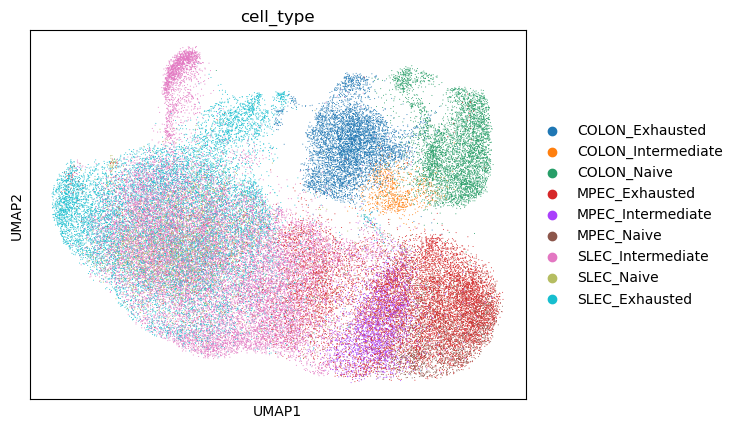

In [4]:
sc.pl.umap(adata, color="cell_type")

In [5]:
#adata_cpm = adata.copy()  # apply this to a copy so we can compare methods
#adata_cpm.raw = adata_cpm  # store a copy of the raw values before normalizing
#sc.pp.normalize_per_cell(adata_cpm, 
                         #counts_per_cell_after=1e6)

In [6]:
#pdata = dc.get_pseudobulk(adata,
#                          sample_col='sample_id',
#                          groups_col="cell_type",
#                          layer='counts',
#                          mode='sum',
#                          min_cells=100,
#                          min_counts=1000
#                         )

In [7]:
scales_counts = sc.pp.normalize_total(adata, target_sum=None, inplace=False)
# log1p transform
adata.layers["log1p_norm"] = sc.pp.log1p(scales_counts["X"], copy=True)

In [8]:
import pandas as pd

# Step 1: Extract the log1p_norm layer
log1p_norm_matrix = adata.layers["log1p_norm"]

# Step 2: Convert to a pandas DataFrame
# Ensure the rows (index) correspond to samples (adata.obs_names) and columns to genes (adata.var_names)
log1p_norm_df = pd.DataFrame(log1p_norm_matrix,   
                             index=adata.obs_names,   # Sample names as row indices
                             columns=adata.var.gene_name) # Gene names as column headers

# Step 3: Export to CSV
#log1p_norm_df.T.to_csv("log1p_norm_matrix.csv")

In [9]:
log1p_norm_df.T

,AAACCTGAGTTAAGTG-1_10mix1,AAACCTGCAGGATCGA-1_10mix1,AAACCTGCATAACCTG-1_10mix1,AAACCTGCATACCATG-1_10mix1,AAACCTGGTGTGCCTG-1_10mix1,AAACCTGTCTTAACCT-1_10mix1,AAACGGGCAAGGTTCT-1_10mix1,AAACGGGGTATTACCG-1_10mix1,AAACGGGGTCGAGATG-1_10mix1,AAAGATGAGATCCCAT-1_10mix1,...,TTTGTCAGTTCGCTAA-1_GF_ICI2_plus,TTTGTCATCAATAAGG-1_GF_ICI2_plus,TTTGTCATCACGCATA-1_GF_ICI2_plus,TTTGTCATCATGGTCA-1_GF_ICI2_plus,TTTGTCATCCAGAGGA-1_GF_ICI2_plus,TTTGTCATCCCTTGCA-1_GF_ICI2_plus,TTTGTCATCGTTGCCT-1_GF_ICI2_plus,TTTGTCATCTAACTGG-1_GF_ICI2_plus,TTTGTCATCTCTGTCG-1_GF_ICI2_plus,TTTGTCATCTGTTGAG-1_GF_ICI2_plus
gene_name,,,,,,,,,,,,,,,,,,,,,
Mrpl15,0.000000,0.0,2.244224,0.000000,0.0,0.000000,1.28739,0.000000,1.737694,0.0,...,0.000000,0.000000,1.757347,0.000000,0.0,0.00000,1.193816,0.000000,2.530077,0.000000
Lypla1,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,1.737694,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,1.097816,0.000000,2.530077,0.000000
Tcea1,0.000000,0.0,2.244224,1.950369,0.0,1.812609,1.28739,0.000000,1.737694,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,1.193816,0.000000,2.530077,0.000000
Atp6v1h,2.581758,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,...,0.000000,0.000000,1.757347,0.000000,0.0,0.00000,1.097816,0.000000,0.000000,1.693097
Rb1cc1,2.581758,0.0,0.000000,0.000000,0.0,1.812609,0.00000,2.032687,0.000000,0.0,...,2.669523,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,2.197122,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CAAA01118383.1,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.28739,0.000000,1.737694,0.0,...,0.000000,0.000000,1.757347,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000
Vamp7,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000
Tmlhe,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000


In [10]:
with open('scFEA.mouse.genes.txt', 'r') as f:
    gene_list = f.read().splitlines()  # This creates a list of genes

# Step 2: Filter the DataFrame to keep only the genes in the list
filtered_log1p_norm_df = log1p_norm_df.T.loc[log1p_norm_df.T.index.isin(gene_list)]


In [11]:
filtered_log1p_norm_df

,AAACCTGAGTTAAGTG-1_10mix1,AAACCTGCAGGATCGA-1_10mix1,AAACCTGCATAACCTG-1_10mix1,AAACCTGCATACCATG-1_10mix1,AAACCTGGTGTGCCTG-1_10mix1,AAACCTGTCTTAACCT-1_10mix1,AAACGGGCAAGGTTCT-1_10mix1,AAACGGGGTATTACCG-1_10mix1,AAACGGGGTCGAGATG-1_10mix1,AAAGATGAGATCCCAT-1_10mix1,...,TTTGTCAGTTCGCTAA-1_GF_ICI2_plus,TTTGTCATCAATAAGG-1_GF_ICI2_plus,TTTGTCATCACGCATA-1_GF_ICI2_plus,TTTGTCATCATGGTCA-1_GF_ICI2_plus,TTTGTCATCCAGAGGA-1_GF_ICI2_plus,TTTGTCATCCCTTGCA-1_GF_ICI2_plus,TTTGTCATCGTTGCCT-1_GF_ICI2_plus,TTTGTCATCTAACTGG-1_GF_ICI2_plus,TTTGTCATCTCTGTCG-1_GF_ICI2_plus,TTTGTCATCTGTTGAG-1_GF_ICI2_plus
gene_name,,,,,,,,,,,,,,,,,,,,,
Rdh10,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000
B3gat2,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000
Mgat4a,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000
Chst10,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000
Gls,0.0,0.0,2.244224,0.0,0.000000,1.812609,0.00000,0.0,0.000000,0.0,...,2.669523,0.000000,0.0,2.364621,0.00000,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Hsd17b10,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,1.693097
Sms,0.0,0.0,0.000000,0.0,2.027083,0.000000,1.28739,0.0,1.737694,0.0,...,0.000000,1.777059,0.0,0.000000,2.10226,0.0,1.246145,2.197122,0.000000,0.000000
Pdha1,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,...,2.669523,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,2.530077,0.000000


In [12]:
filtered_log1p_norm_df.to_csv("log1p_norm_matrix_re.csv")

In [13]:
filtered_log1p_norm_df

,AAACCTGAGTTAAGTG-1_10mix1,AAACCTGCAGGATCGA-1_10mix1,AAACCTGCATAACCTG-1_10mix1,AAACCTGCATACCATG-1_10mix1,AAACCTGGTGTGCCTG-1_10mix1,AAACCTGTCTTAACCT-1_10mix1,AAACGGGCAAGGTTCT-1_10mix1,AAACGGGGTATTACCG-1_10mix1,AAACGGGGTCGAGATG-1_10mix1,AAAGATGAGATCCCAT-1_10mix1,...,TTTGTCAGTTCGCTAA-1_GF_ICI2_plus,TTTGTCATCAATAAGG-1_GF_ICI2_plus,TTTGTCATCACGCATA-1_GF_ICI2_plus,TTTGTCATCATGGTCA-1_GF_ICI2_plus,TTTGTCATCCAGAGGA-1_GF_ICI2_plus,TTTGTCATCCCTTGCA-1_GF_ICI2_plus,TTTGTCATCGTTGCCT-1_GF_ICI2_plus,TTTGTCATCTAACTGG-1_GF_ICI2_plus,TTTGTCATCTCTGTCG-1_GF_ICI2_plus,TTTGTCATCTGTTGAG-1_GF_ICI2_plus
gene_name,,,,,,,,,,,,,,,,,,,,,
Rdh10,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000
B3gat2,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000
Mgat4a,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000
Chst10,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000
Gls,0.0,0.0,2.244224,0.0,0.000000,1.812609,0.00000,0.0,0.000000,0.0,...,2.669523,0.000000,0.0,2.364621,0.00000,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Hsd17b10,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,1.693097
Sms,0.0,0.0,0.000000,0.0,2.027083,0.000000,1.28739,0.0,1.737694,0.0,...,0.000000,1.777059,0.0,0.000000,2.10226,0.0,1.246145,2.197122,0.000000,0.000000
Pdha1,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,...,2.669523,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,2.530077,0.000000


In [14]:
#!pip install --user magic-impute

In [ ]:
%%bash
#cd /Users/chang/Documents/work/flux/scFEA
python scfea/src/scFEA.py --data_dir data --input_dir input \
                    --test_file log1p_norm_matrix.csv \
                    --moduleGene_file module_gene_complete_mouse_m168.csv \
                    --stoichiometry_matrix cmMat_complete_mouse_c70_m168.csv \
                    --sc_imputation True \
                    --output_flux_file output/mouse_flux.csv \
                    --output_balance_file output/mouse_balance.csv